In [1]:

import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np

In [2]:
data = {
    "영화" : ['명량','극한직업','신과함께 -죄와 벌','국제시장', '베테랑', '괴물', '도둑들', '7번방의 선물', '암살', '광해, 왕이 된 남자'],
    "개봉 연도" : [2014, 2019, 2017, 2014, 2015, 2006, 2012, 2013, 2015, 2012],
    "관객 수" : [1761, 1626, 1441, 1425, 1341, 1301, 1298, 1281, 1270, 1231],  # 단위 : 만명
    "평점" : [8.88, 9.20, 8.73, 9.16, 9.24, 8.62, 7.64, 8.83, 9.10, 9.25]
}

data

{'영화': ['명량',
  '극한직업',
  '신과함께 -죄와 벌',
  '국제시장',
  '베테랑',
  '괴물',
  '도둑들',
  '7번방의 선물',
  '암살',
  '광해, 왕이 된 남자'],
 '개봉 연도': [2014, 2019, 2017, 2014, 2015, 2006, 2012, 2013, 2015, 2012],
 '관객 수': [1761, 1626, 1441, 1425, 1341, 1301, 1298, 1281, 1270, 1231],
 '평점': [8.88, 9.2, 8.73, 9.16, 9.24, 8.62, 7.64, 8.83, 9.1, 9.25]}

In [12]:
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께 -죄와 벌,2017,1441,8.73
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83
8,암살,2015,1270,9.10
9,"광해, 왕이 된 남자",2012,1231,9.25


### 1) 영화 데이터를 활용하여 x 축은 영화명,  y축은 평점인 막대 그래프 작성

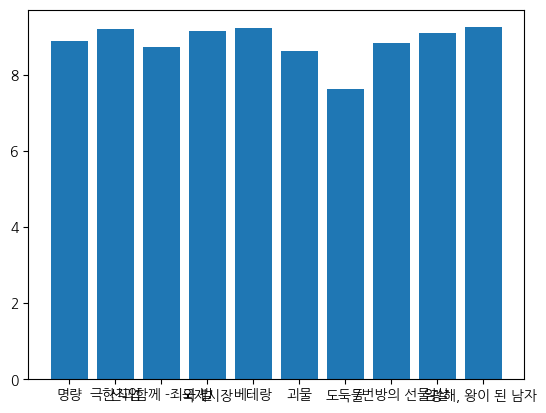

In [ ]:


g = plt.bar(df['영화'], df['평점'])

### 2) 앞에서 작성한 막대 그래프에 아래에 제시된 세부 사항을 적용하기

- 제목 : 국내 Top10 영화 평점 정보
- x 축 label : 영화(90도 회전)
- y 축 label : 평점

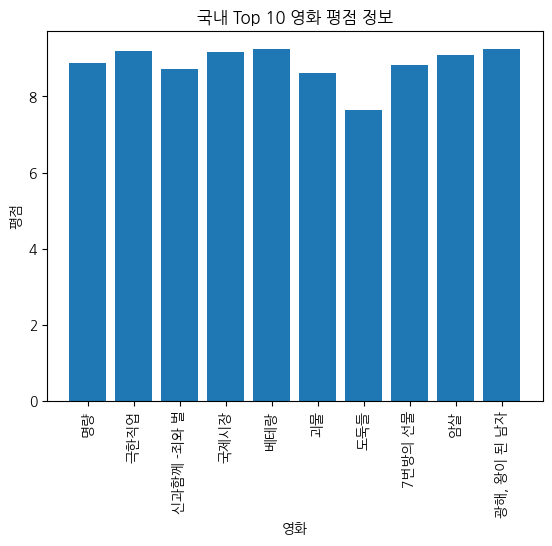

In [28]:

plt.title("국내 Top 10 영화 평점 정보")
plt.xlabel('영화')
plt.xticks(rotation=90)
plt.ylabel('평점')

g = plt.bar(df['영화'], df['평점'])

### 3) 개봉 연도별 평점 변화 추이를 꺽은선 그래프로 작성하기
- 연도별 평균 데이터를 구한 후 그래프 작성

In [32]:

df1 = df.groupby('개봉 연도')['평점'].mean().reset_index()
df1

,개봉 연도,평점
0,2006,8.620
1,2012,8.445
2,2013,8.830
3,2014,9.020
4,2015,9.170
5,2017,8.730
6,2019,9.200


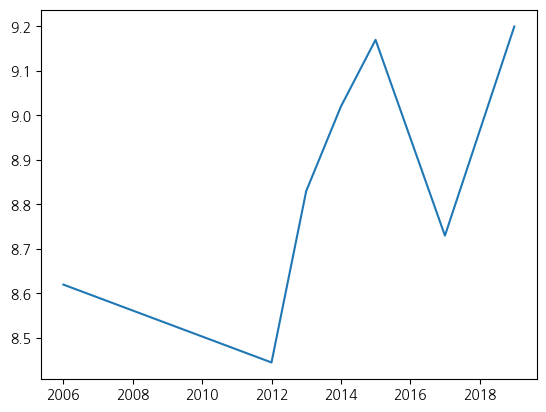

In [34]:
plt.plot(df1['개봉 연도'],df1["평점"])

### 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오

- marker : 'o'
- x축 눈금 : 5년 단위(2005, 2010, 2015, 2020)
- y축 범위 : 최소 7, 최대 10

(7.0, 10.0)

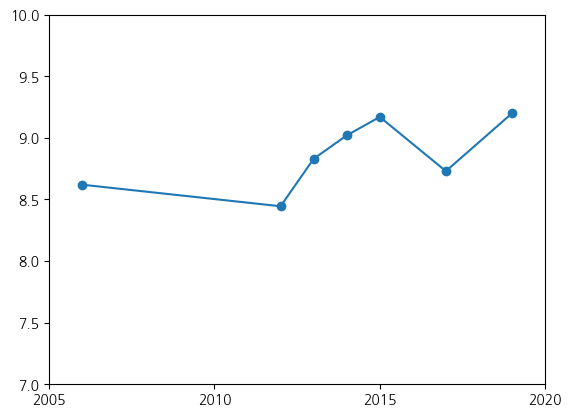

In [41]:
plt.plot(df1['개봉 연도'],df1["평점"], marker='o')
plt.xticks([2005,2010,2015,2020])
plt.ylim(top=10, bottom=7)

### 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프 작성하고 세부사항을 적용하시오

- label : 9점이상 / 9점 미만
- 퍼센트 : 소수점 첫째 자리까지 표시
- 범례 : 그래프 우측에 표시

#### 9점이상

In [44]:
filt = df['평점'] >= 9.0
filt

df[filt]

,영화,개봉 연도,관객 수,평점
1,극한직업,2019,1626,9.20
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
8,암살,2015,1270,9.10
9,"광해, 왕이 된 남자",2012,1231,9.25


In [45]:
df[~filt]

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
2,신과함께 -죄와 벌,2017,1441,8.73
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83


#### 9점이하

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
2,신과함께 -죄와 벌,2017,1441,8.73
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83


In [49]:
# 9점 이상과 9점 이하

len(df[filt])
len(df[~filt])

values = [len(df[filt]),len(df[~filt])]
values

[5, 5]

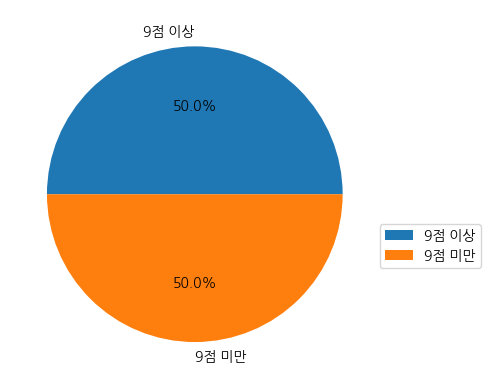

In [50]:
plt.pie(values, labels=['9점 이상','9점 미만'], autopct="%.1f%%")
plt.legend(loc=(1,0.3))